# SmartBus Network Analytics: Route Clustering & Hub Visualization for India

In [223]:
import warnings
warnings.filterwarnings("ignore")

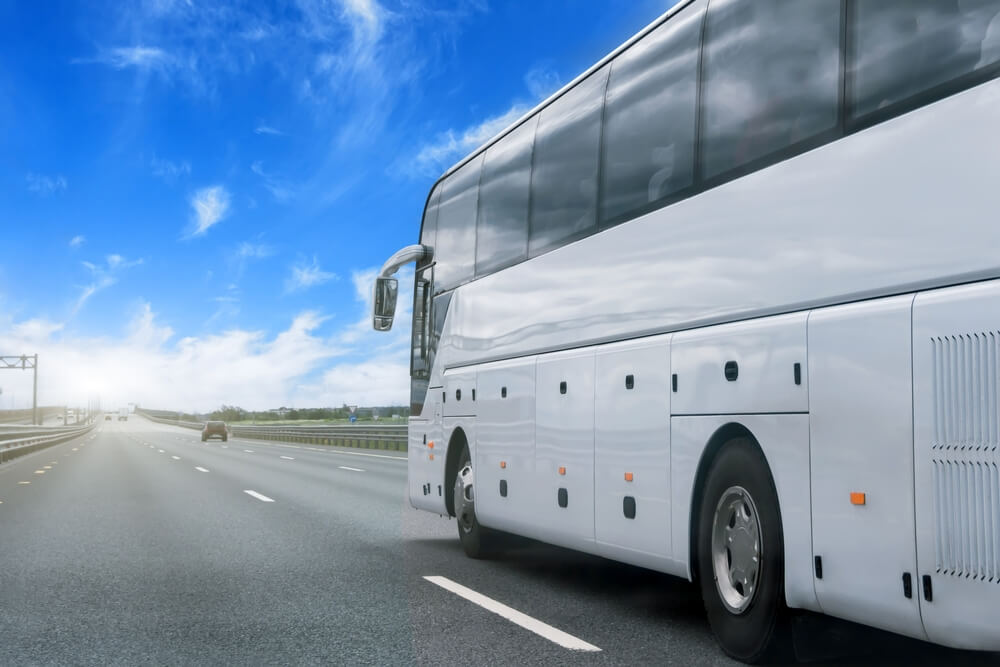

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [226]:
data = pd.read_csv("Pan-India_Bus_Routes.csv")
data

,From,To,Operator,Distance,Duration,Bus Type,Departure,Arrival
0,Sattur,Chennai,PERINBA VILAS TRAVELS,539,0:9:0,"A/C, 35 Seat, 2+2 Semi Sleeper, Air Suspensio...",09:30:00 PM,06:30:00 AM
1,Sattur,Chennai,PERINBA VILAS TRAVELS,539,0:10:45,"Non A/C, 34 Seat, 2+1 Executive, Air Suspensio...",07:45:00 PM,06:30:00 AM
2,Sattur,Chennai,KPN Travels,539,0:9:45,2+2 : 33 S.S NON A/C,07:45:00 PM,05:30:00 AM
3,Sattur,Salem,Srs Travels (SRS Travels),304,0:5:45,"2+1, Sleeper, AC, Non-Video",09:45:00 PM,03:30:00 AM
4,Sattur,Coimbatore,India Travel Service,295,0:6:40,2+2 Hitech Air Bus Non/AC,10:20:00 PM,05:00:00 AM
...,...,...,...,...,...,...,...,...
35662,Mangalore,Bijapur,Ganesh Travels (Ganesh Tourists),560,0:14:0,"1+2, Sleeper/Seater, Non-AC, Non-Video",04:30:00 PM,06:30:00 AM
35663,Mangalore,Bijapur,Ganesh Travels (Ganesh Tourists),560,0:14:0,"1+2, Sleeper/Seater, Non-AC",06:30:00 PM,08:30:00 AM
35664,Mangalore,Jewargi,VRL,680,0:17:0,New 2+2 Executive Air-Bus,04:00:00 PM,04:00:00 PM
35665,Mangalore,Jewargi,VRL,680,0:17:0,A/c-Sleeper(N),02:30:00 PM,02:30:00 PM


In [227]:
data.columns

Index(['From', 'To', 'Operator', 'Distance', 'Duration', 'Bus Type',
       'Departure', 'Arrival'],
      dtype='object')

In [228]:
data.shape

(35667, 8)

In [229]:
data.isnull().sum().sum()

0

In [230]:
data.describe()

,Distance
count,35667.000000
mean,397.676928
std,214.669345
min,1.000000
25%,260.000000
50%,379.000000
75%,505.000000
max,3009.000000


In [231]:
data['Distance'].mean()

397.67692825300696

In [232]:
unique_operators = data['Operator'].nunique()
unique_operators

940

In [233]:
unique_operators = data['Operator'].unique()
unique_operators

array(['PERINBA VILAS TRAVELS', 'KPN Travels',
       'Srs Travels (SRS Travels)', 'India Travel Service',
       'Royal Travels', 'Shree Sahjanand Travels',
       'Sugama Tourists  Y (Sugama  Tourists)', 'Diwakar Travels',
       'Kallada Travels', 'akash BUS AMRAVATI', 'Sangeetam Travels',
       'akash BUS AMRAVATI-Sangeetam 2x1',
       'akash BUS AMRAVATI-2x1 a/c air sus-lcd', 'Vidarbha Express',
       'Rachna Travels', 'Sheetal Travels Akola', 'Hans Travels Indore-',
       'shreenath travellers', 'Kings Travels', 'Bharathi Travels',
       'Sachin Travels', 'SRM Transports India Private Limited',
       'Seabird Tourists', 'Shama sardar Travels',
       'Roadlink India Pvt  Ltd (RoadlinkIndia)',
       'S.S. Travels Silk Board Junction', 'Sangita  Travels',
       'A1 Travels', 'Neeta Tours and Travels', 'Hanuman Motors',
       'libra bus service pvt. ltd.', 'Jujhar',
       'libra bus service pvt. ltd.-Mercedes Benz',
       'Olivea (Business Class)', 'PUNBUS/ Punjab Roadway

In [234]:
data['Distance'].max()

3009

In [235]:
data['Distance'].min()

1

# DISTANCE AND DURATION ANALYSIS - BUS NETWORK ANALYTICS

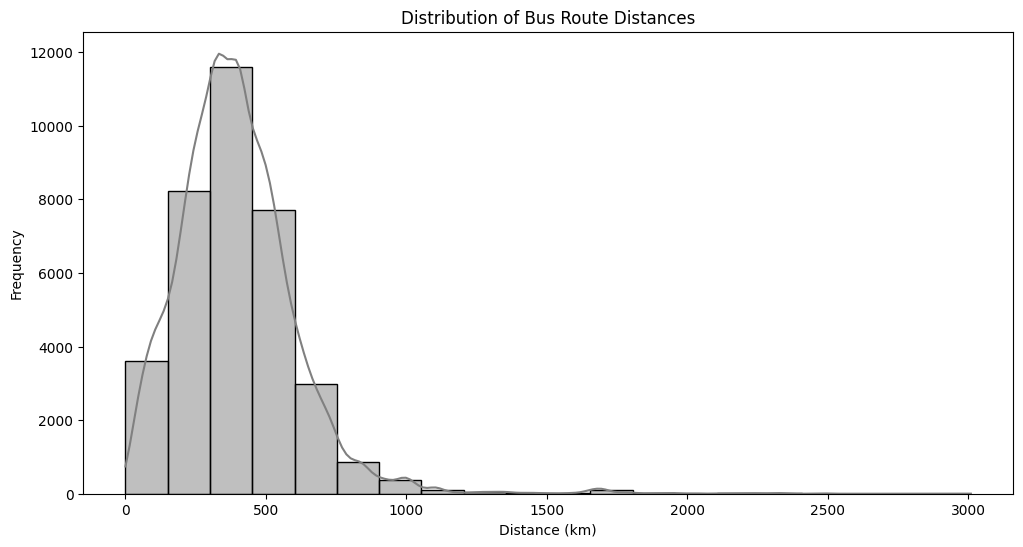

In [237]:
# Distance Visualisation
plt.figure(figsize=(12,6))
sns.histplot(data['Distance'],bins = 20, kde=True, color='grey')
plt.title("Distribution of Bus Route Distances")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

# OPERATOR ANALYSIS - INDIAN BUS NETWORK ANALYTICS

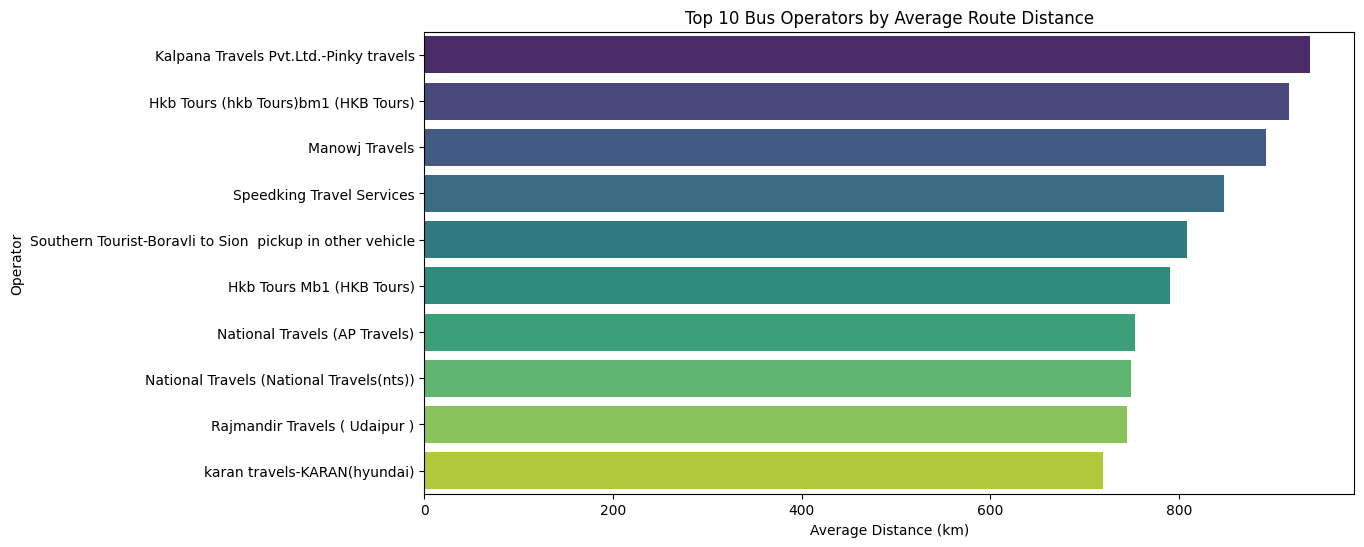

In [239]:
# Top 10 Bus Operators
avg_distance_per_operator = data.groupby('Operator')['Distance'].mean().reset_index()

# Sort descending and take top 10
top10_operators = avg_distance_per_operator.sort_values(by='Distance', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top10_operators, x='Distance', y='Operator', palette='viridis')
plt.title("Top 10 Bus Operators by Average Route Distance")
plt.xlabel("Average Distance (km)")
plt.ylabel("Operator")
plt.show()

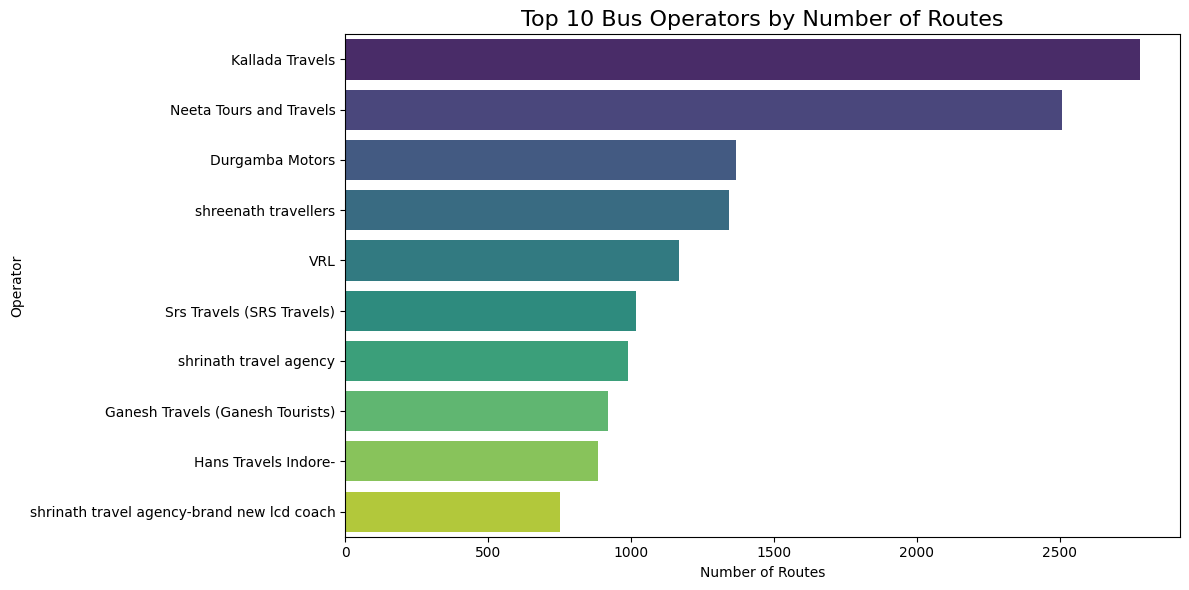

In [240]:
# Top 10 operators by number of routes
top_operators = data['Operator'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_operators.values, y=top_operators.index, palette="viridis")
plt.title("Top 10 Bus Operators by Number of Routes", fontsize=16)
plt.xlabel("Number of Routes")
plt.ylabel("Operator")
plt.tight_layout()

In [241]:
# Top operators by average duration (convert duration to minutes first)
data['Duration_minutes'] = data['Duration'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]) + int(x.split(':')[2])/60)
avg_duration = data.groupby('Operator')['Duration_minutes'].mean().sort_values(ascending=False).head(10)
print(avg_duration)

Operator
Manowj Travels                               45.833333
Jay Travels                                  44.000000
Manmandir Motel & Travels Pvt. Ltd-satyam    39.000000
Kalpana Travels Pvt.Ltd.-gogadev             35.500000
Mahendra Rajhans Travels                     33.500000
Kalpana Travels Pvt.Ltd.-Pinky travels       24.666667
Oasis Travels (AP Travels)                   24.250000
Shree Parshwanath Travels                    23.733333
noor travels-(Amber-cool queen)              21.800000
noor travels-(Royal Comfort exp)             21.800000
Name: Duration_minutes, dtype: float64


# ROUTE ANALYSIS - INDIAN BUS NETWORK ANALYTICS

In [243]:
# Top 10 busiest routes (Departure -> Arrival)
data['Route'] = data['Departure'] + " → " + data['Arrival']
top_routes = data['Route'].value_counts().head(10)
print(top_routes)

Route
09:00:00 PM → 06:00:00 AM    139
08:00:00 PM → 06:00:00 AM    138
10:00:00 PM → 06:00:00 AM    134
09:30:00 PM → 06:00:00 AM    126
08:00:00 PM → 07:00:00 AM    113
09:00:00 PM → 07:00:00 AM    111
10:30:00 PM → 06:00:00 AM    110
08:30:00 PM → 06:30:00 AM    110
09:30:00 PM → 06:30:00 AM    108
09:00:00 PM → 05:00:00 AM    105
Name: count, dtype: int64


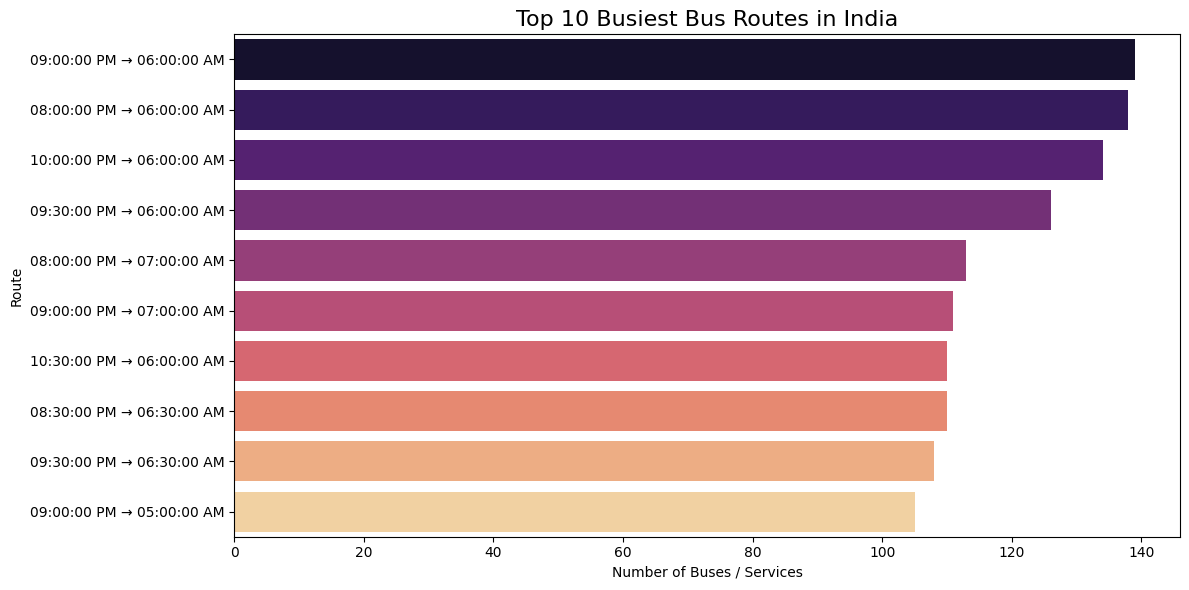

In [244]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette="magma")
plt.title("Top 10 Busiest Bus Routes in India", fontsize=16)
plt.xlabel("Number of Buses / Services")
plt.ylabel("Route")
plt.tight_layout()
plt.show()

In [245]:
# Average distance per route
avg_distance_route = data.groupby('Route')['Distance'].mean().sort_values(ascending=False).head(10)
print(avg_distance_route)

Route
07:50:00 PM → 11:04:00 PM    3009.0
03:30:00 PM → 08:05:00 AM    2297.0
05:30:00 PM → 08:05:00 AM    2245.0
07:50:00 PM → 02:20:00 AM    2136.0
02:55:00 PM → 11:45:00 PM    1775.0
05:00:00 PM → 01:50:00 AM    1775.0
10:55:00 PM → 06:55:00 AM    1712.0
11:20:00 PM → 06:45:00 AM    1712.0
10:10:00 PM → 06:50:00 AM    1697.0
09:50:00 PM → 07:25:00 AM    1697.0
Name: Distance, dtype: float64


# BUS TYPE ANALYSIS - INDIAN BUS NETWORK ANALYTICS

In [247]:
# Count by bus type
bus_types = data['Bus Type'].value_counts()
print(bus_types)

Bus Type
Non A/c                                  7611
A/c                                      4980
Multiaxle B9R VOLVO A/C SEMI SLEEPER     2041
B9R Multi-Axle Semi Sleeper Volvo A/C    1694
Volvo  A/c                               1008
                                         ... 
Seater Non A/C                              1
2+2, Hitech, AC, Non-Video                  1
2+1 Non A/c Sleeper Cum Seater              1
2+2 BS3 Classic A/c                         1
2+2Hitech Air Bus A/C (Day Service)         1
Name: count, Length: 436, dtype: int64


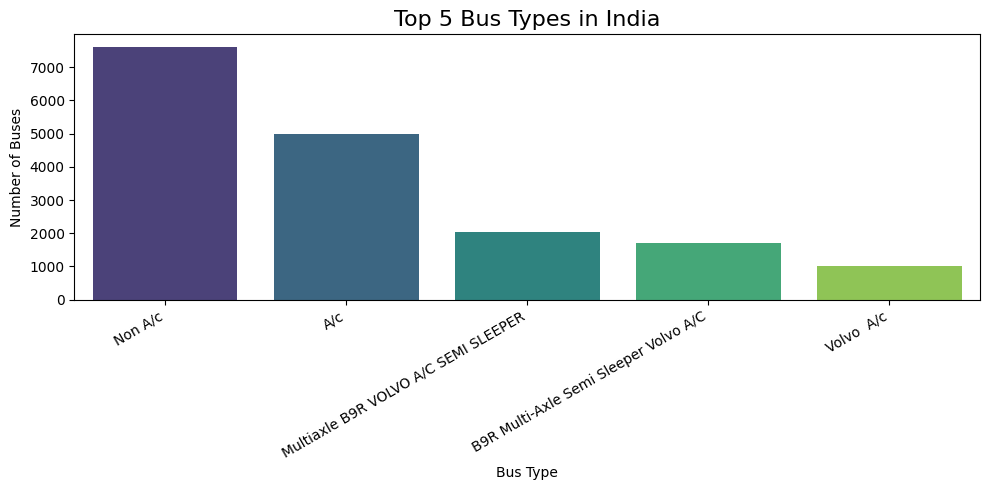

In [248]:
# Top 5 Bus Types
top5_bus_types = data['Bus Type'].value_counts().head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top5_bus_types.index, y=top5_bus_types.values, palette="viridis")
plt.title("Top 5 Bus Types in India", fontsize=16)
plt.xlabel("Bus Type")
plt.ylabel("Number of Buses")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [249]:
# Split AC/Non-AC
data['AC_Type'] = data['Bus Type'].apply(lambda x: 'AC' if 'AC' in x else 'Non-AC')
ac_distribution = data['AC_Type'].value_counts()
print(ac_distribution)

AC_Type
Non-AC    29976
AC         5691
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='AC_Type'>

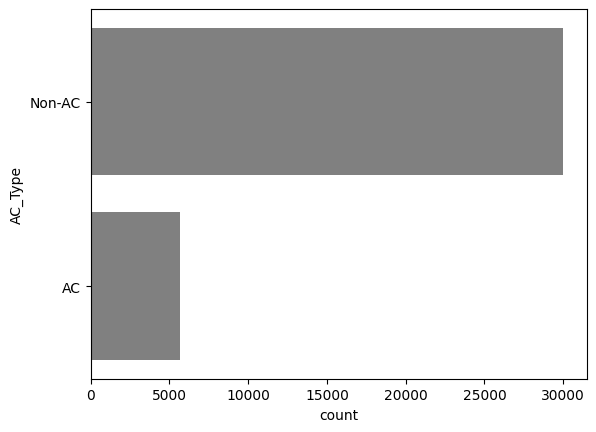

In [250]:
sns.countplot(data['AC_Type'], color = 'grey' )

# TRAVEL TIME V/S DISTANCE ANALYSIS - BUS NETWORK ANALYSIS

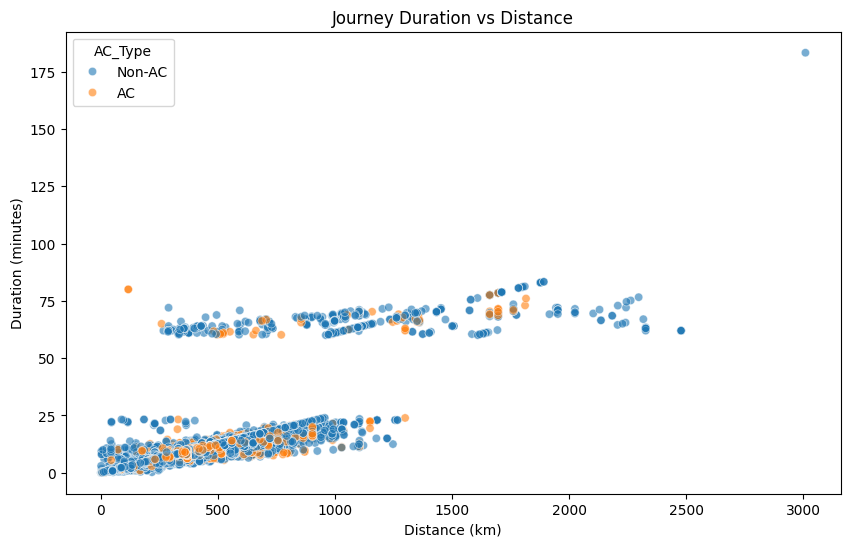

In [252]:
# Efficiency of routes or operators.
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Distance', y='Duration_minutes', hue='AC_Type', alpha=0.6)
plt.title("Journey Duration vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Duration (minutes)")
plt.show()

In [253]:
# Find max distance
max_distance = data['Distance'].max()

# Filter rows with max distance
longest_routes = data[data['Distance'] == max_distance][['Departure', 'Arrival', 'Operator', 'Distance']]
print("Longest Distance Routes:")
print(longest_routes)

Longest Distance Routes:
      Departure      Arrival         Operator  Distance
83  07:50:00 PM  11:04:00 PM  Kallada Travels      3009


In [254]:
# Find min distance
min_distance = data['Distance'].min()

# Filter rows with min distance
shortest_routes = data[data['Distance'] == min_distance][['Departure', 'Arrival', 'Operator', 'Distance']]
print("\nShortest Distance Routes:")
print(shortest_routes)


Shortest Distance Routes:
        Departure      Arrival              Operator  Distance
1723  08:11:00 PM  08:12:00 PM  Sri Durgamba Travels         1


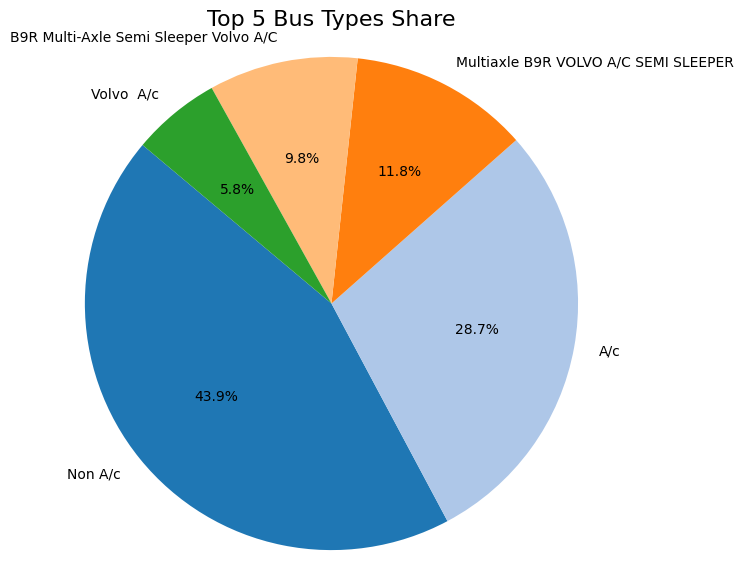

In [255]:
top5_bus_types = data['Bus Type'].value_counts().head(5)

plt.figure(figsize=(7,7))
plt.pie(top5_bus_types.values, labels=top5_bus_types.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Top 5 Bus Types Share", fontsize=16)
plt.axis('equal')
plt.show()

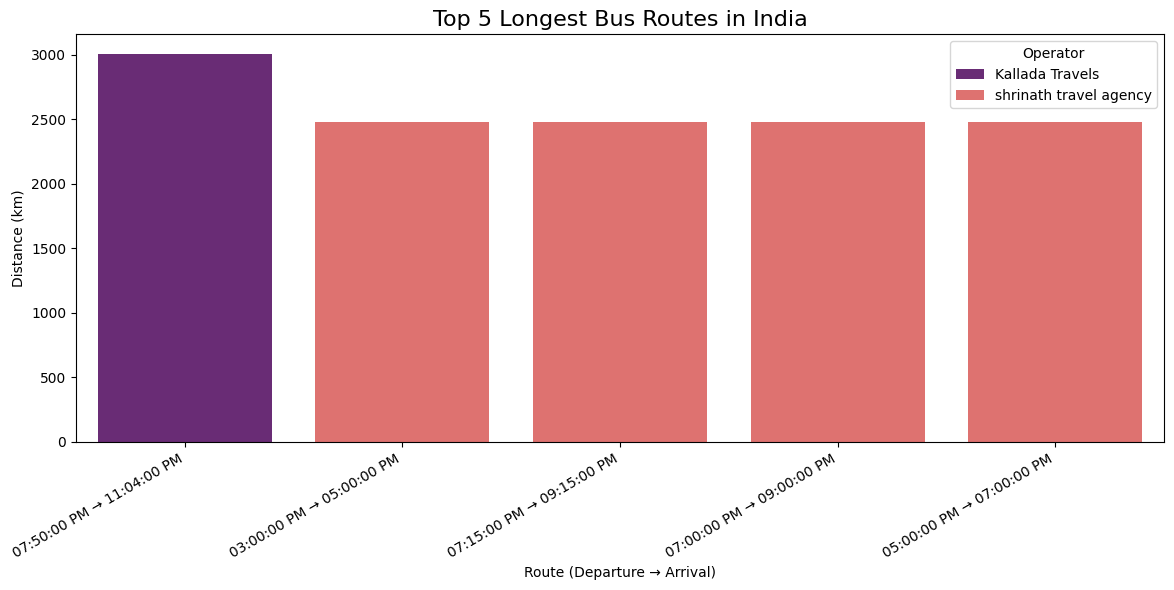

In [256]:
# Sort by distance descending and take top 5
top5_longest = data.sort_values(by='Distance', ascending=False).head(5)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top5_longest['Departure'] + " → " + top5_longest['Arrival'],
    y=top5_longest['Distance'],
    hue=top5_longest['Operator'],
    dodge=False,
    palette="magma"
)
plt.title("Top 5 Longest Bus Routes in India", fontsize=16)
plt.xlabel("Route (Departure → Arrival)")
plt.ylabel("Distance (km)")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Operator")
plt.tight_layout()
plt.show()

#  ROUTE CLUSTERING - ANALYTICS

In [258]:
import networkx as nx

In [259]:
# Create graph
G = nx.Graph()
for idx, row in data.iterrows():
    G.add_edge(row['Departure'], row['Arrival'], weight=row['Distance'])

# Compute degree centrality (most connected cities)
centrality = nx.degree_centrality(G)
top_cities = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top connected cities:", top_cities)

Top connected cities: [('09:00:00 PM', 0.2853898561695685), ('10:00:00 PM', 0.25889477668433003), ('09:30:00 PM', 0.2505677517032551), ('08:30:00 PM', 0.24526873580620742), ('08:00:00 PM', 0.23694171082513246), ('10:30:00 PM', 0.22710068130204392), ('07:00:00 PM', 0.1975775927327782), ('06:30:00 PM', 0.1975775927327782), ('11:00:00 PM', 0.19227857683573052), ('06:00:00 PM', 0.18925056775170326)]


In [260]:
top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:50]
G_sub = G.subgraph(top_nodes)

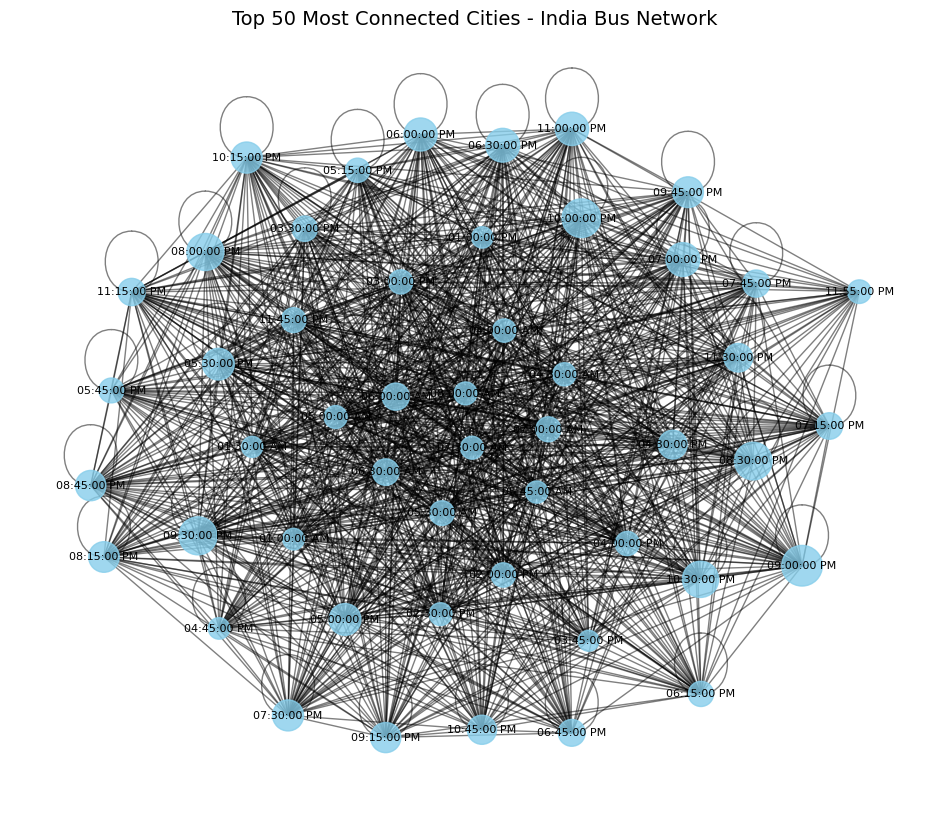

In [261]:
# Compute positions
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G_sub, k=0.5, iterations=100)

# Draw nodes with size proportional to centrality
node_sizes = [centrality[node]*3000 for node in G_sub.nodes()]
nx.draw_networkx_nodes(G_sub, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G_sub, pos, width=1.0, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G_sub, pos, font_size=8)

plt.title("Top 50 Most Connected Cities - India Bus Network", fontsize=14)
plt.axis('off')
plt.show()

In [262]:
# Sort cities by centrality (descending)
top_cities = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Display top 10
for city, cent_value in top_cities[:10]:
    print(f"{city}: {cent_value:.3f}")

09:00:00 PM: 0.285
10:00:00 PM: 0.259
09:30:00 PM: 0.251
08:30:00 PM: 0.245
08:00:00 PM: 0.237
10:30:00 PM: 0.227
07:00:00 PM: 0.198
06:30:00 PM: 0.198
11:00:00 PM: 0.192
06:00:00 PM: 0.189


In [263]:
# Using your graph G
degree_dict = dict(G.degree())  # Number of direct connections
centrality = nx.degree_centrality(G)  # Normalized between 0-1
# Sort by centrality
hotspots = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Bus Hotspots (Most Connected Cities):")
for city, cent in hotspots:
    print(f"{city} - Centrality: {cent:.3f} | Routes: {degree_dict[city]}")

Top 10 Bus Hotspots (Most Connected Cities):
09:00:00 PM - Centrality: 0.285 | Routes: 377
10:00:00 PM - Centrality: 0.259 | Routes: 342
09:30:00 PM - Centrality: 0.251 | Routes: 331
08:30:00 PM - Centrality: 0.245 | Routes: 324
08:00:00 PM - Centrality: 0.237 | Routes: 313
10:30:00 PM - Centrality: 0.227 | Routes: 300
07:00:00 PM - Centrality: 0.198 | Routes: 261
06:30:00 PM - Centrality: 0.198 | Routes: 261
11:00:00 PM - Centrality: 0.192 | Routes: 254
06:00:00 PM - Centrality: 0.189 | Routes: 250


# PREDICT UNDER-SERVED ROUTES // BUS NETWORK ANALYTICS

In [265]:
import networkx as nx

# Create graph from your dataset
G = nx.Graph()

# Add edges (routes)
for idx, row in data.iterrows():
    G.add_edge(row['Departure'], row['Arrival'], weight=row['Distance'])

In [266]:
# We want pairs of cities that do not currently have a direct route:
from itertools import combinations

# All possible city pairs
all_city_pairs = list(combinations(G.nodes(), 2))

# Existing edges
existing_edges = set(G.edges())

# Candidate missing links
missing_links = [pair for pair in all_city_pairs if pair not in existing_edges]


In [267]:
preds = nx.jaccard_coefficient(G, missing_links)

# Sort by score
predicted_routes = sorted(preds, key=lambda x: x[2], reverse=True)[:20]  # top 20
for u, v, score in predicted_routes:
    print(f"Potential Route: {u} -> {v} | Score: {score:.3f}")

Potential Route: 09:19:00 AM -> 03:46:00 AM | Score: 1.000
Potential Route: 02:23:00 PM -> 04:27:00 PM | Score: 1.000
Potential Route: 03:22:00 AM -> 09:07:00 AM | Score: 1.000
Potential Route: 03:22:00 AM -> 08:22:00 AM | Score: 1.000
Potential Route: 04:37:00 AM -> 12:16:00 PM | Score: 1.000
Potential Route: 06:46:00 PM -> 10:16:00 PM | Score: 1.000
Potential Route: 12:29:00 PM -> 11:51:00 PM | Score: 1.000
Potential Route: 04:42:00 PM -> 07:13:00 AM | Score: 1.000
Potential Route: 04:42:00 PM -> 01:41:00 PM | Score: 1.000
Potential Route: 02:57:00 PM -> 01:51:00 PM | Score: 1.000
Potential Route: 02:57:00 PM -> 01:11:00 PM | Score: 1.000
Potential Route: 02:57:00 PM -> 04:57:00 PM | Score: 1.000
Potential Route: 07:06:00 PM -> 12:09:00 AM | Score: 1.000
Potential Route: 06:00:02 AM -> 09:00:02 AM | Score: 1.000
Potential Route: 02:39:00 PM -> 12:33:00 AM | Score: 1.000
Potential Route: 07:00:01 AM -> 04:00:01 AM | Score: 1.000
Potential Route: 04:39:00 PM -> 08:56:00 PM | Score: 1.0

In [268]:
max_distance = 1000  # e.g., 1000 km
predicted_routes_filtered = []
for u, v, score in predicted_routes:
    dist = data.loc[((data['Departure'] == u) & (data['Arrival'] == v)) |
                    ((data['Departure'] == v) & (data['Arrival'] == u)), 'Distance']
    if dist.empty or dist.values[0] < max_distance:
        predicted_routes_filtered.append((u, v, score))

predicted_routes_filtered[:10]  # top 10 feasible under-served routes

[('09:19:00 AM', '03:46:00 AM', 1.0),
 ('02:23:00 PM', '04:27:00 PM', 1.0),
 ('03:22:00 AM', '09:07:00 AM', 1.0),
 ('03:22:00 AM', '08:22:00 AM', 1.0),
 ('04:37:00 AM', '12:16:00 PM', 1.0),
 ('06:46:00 PM', '10:16:00 PM', 1.0),
 ('12:29:00 PM', '11:51:00 PM', 1.0),
 ('04:42:00 PM', '07:13:00 AM', 1.0),
 ('04:42:00 PM', '01:41:00 PM', 1.0),
 ('02:57:00 PM', '01:51:00 PM', 1.0)]

In [269]:
# Top 50 cities by degree centrality
centrality = nx.degree_centrality(G)
top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:50]
G_sub = G.subgraph(top_nodes)

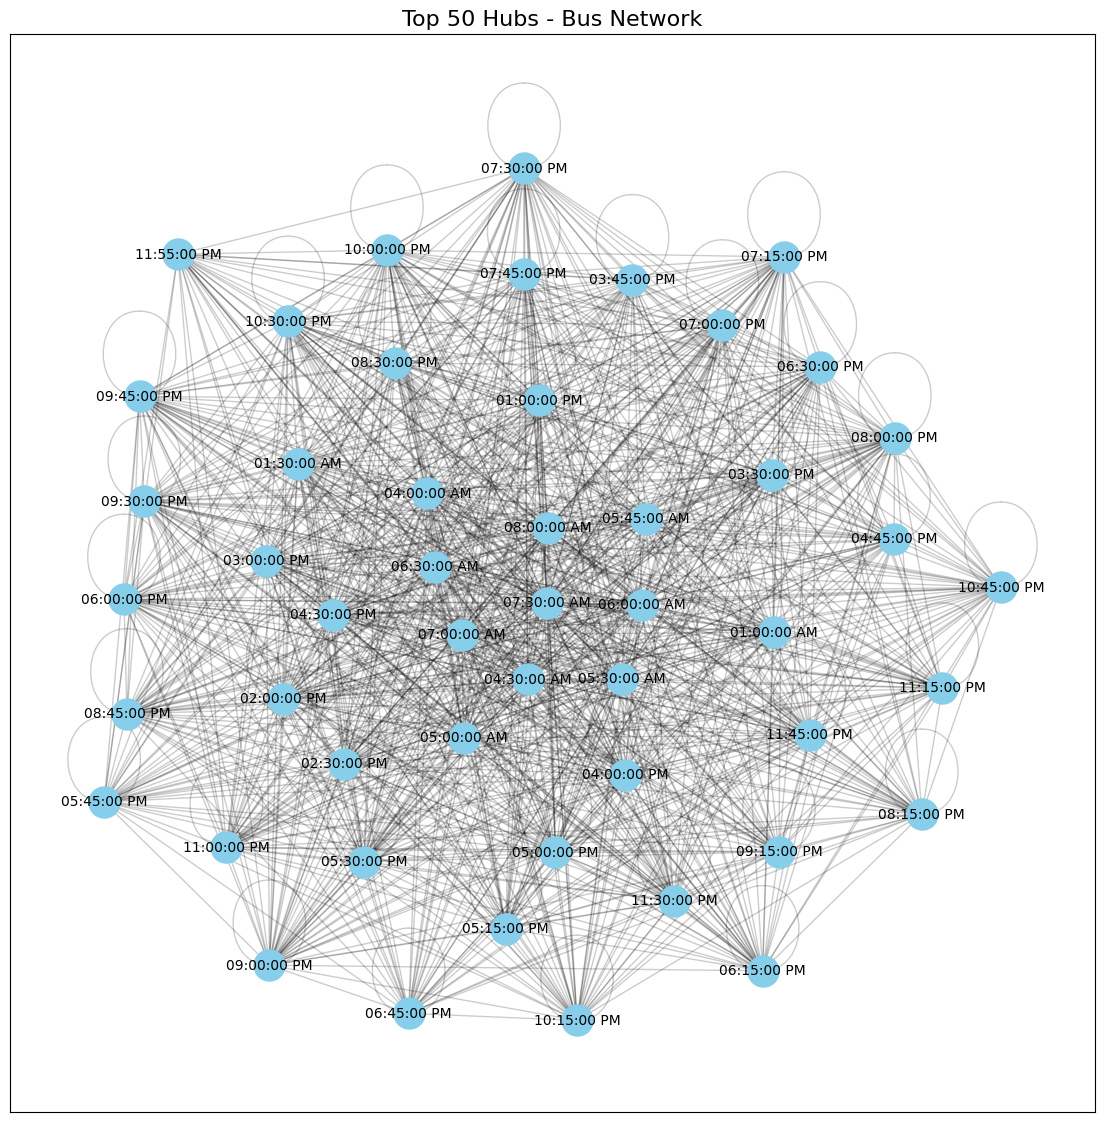

In [270]:
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_sub, k=0.5, iterations=200)  # higher k for more spacing

nx.draw_networkx_edges(G_sub, pos, alpha=0.2)
nx.draw_networkx_nodes(G_sub, pos, node_color='skyblue', node_size=500)
nx.draw_networkx_labels(G_sub, pos, font_size=10)

plt.title("Top 50 Hubs - Bus Network", fontsize=16)
plt.show()

In [271]:
# Predict whether a route between two cities should exist (high probability of being underserved) based on:

#Distance between cities

# Number of operators on nearby routes

# Connectivity of departure and arrival cities (degree centrality)

# Clustering/community membership

# Predict whether a route between two cities should exist (high probability of being underserved)

In [273]:
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Example features for all city pairs
cities = data['Departure'].unique().tolist()
city_pairs = [(u, v) for u in cities for v in cities if u != v]

features = []
labels = []

G = nx.Graph()
for idx, row in data.iterrows():
    G.add_edge(row['Departure'], row['Arrival'], distance=row['Distance'])

centrality = nx.degree_centrality(G)

for u, v in city_pairs:
    # Features
    deg_u = centrality.get(u, 0)
    deg_v = centrality.get(v, 0)
    
    # Distance (approximate)
    dist = data[(data['Departure']==u) & (data['Arrival']==v)]['Distance']
    dist = dist.values[0] if len(dist)>0 else 0
    
    # Label: 1 if route exists, 0 if missing
    label = 1 if G.has_edge(u,v) else 0
    
    features.append([deg_u, deg_v, dist])
    labels.append(label)

X = pd.DataFrame(features, columns=['deg_u','deg_v','distance'])
y = pd.Series(labels)

# TRAIN - TEST - SPLIT 

In [275]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict_proba(X_test_scaled)[:,1]  # probability of missing route

# PREDICT UNDER - SERVED / MISSING ROUTES

In [278]:
# Suppose X has 'from_city' and 'to_city' columns already
# If not, create them first
X['from_city'] = [u for u,v in city_pairs]
X['to_city'] = [v for u,v in city_pairs]

# Then filter by probability
predicted_missing_routes = X[X['prob_missing'] > 0.7]

# Now you can safely access:
predicted_missing_routes[['from_city', 'to_city', 'prob_missing']].sort_values('prob_missing', ascending=False).head(10)

,from_city,to_city,prob_missing
191802,12:58:00 PM,06:43:00 PM,1.0
76636,06:30:00 AM,09:25:00 AM,1.0
76553,06:30:00 AM,10:00:00 AM,1.0
26246,05:20:00 PM,05:50:00 AM,1.0
26156,05:20:00 PM,01:50:00 AM,1.0
26151,05:20:00 PM,09:25:00 AM,1.0
26145,05:20:00 PM,04:50:00 AM,1.0
26126,05:20:00 PM,02:50:00 AM,1.0
26112,05:20:00 PM,07:05:00 PM,1.0
26074,05:20:00 PM,06:30:00 AM,1.0


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Existing network
plt.figure(figsize=(14,14))
pos = nx.spring_layout(G, k=0.3, iterations=100)

# Draw all existing edges lightly
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Draw predicted missing routes in red dashed lines
missing_edges = list(zip(predicted_missing_routes['from_city'], predicted_missing_routes['to_city']))
nx.draw_networkx_edges(
    G, pos,
    edgelist=missing_edges,
    edge_color='red',
    width=2,
    style='dashed',
    label='Predicted Missing Routes'
)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("India Bus Network - Predicted Missing Routes (Red Dashed)", fontsize=16)
plt.legend()
plt.show()

# TOP HUB AND CITIES

In [282]:
import networkx as nx

# Create graph
G = nx.Graph()
for idx, row in data.iterrows():
    G.add_edge(row['Departure'], row['Arrival'], distance=row['Distance'])

# Centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Top 10 hubs by degree
top_hubs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Hubs (Degree Centrality):")
for city, val in top_hubs:
    print(city, round(val, 3))

Top Hubs (Degree Centrality):
09:00:00 PM 0.285
10:00:00 PM 0.259
09:30:00 PM 0.251
08:30:00 PM 0.245
08:00:00 PM 0.237
10:30:00 PM 0.227
07:00:00 PM 0.198
06:30:00 PM 0.198
11:00:00 PM 0.192
06:00:00 PM 0.189


In [294]:
# Suppose threshold is 0.7 for "likely missing route"
y_pred_labels = (y_pred > 0.7).astype(int)

# Then compute accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred_labels) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 96.88%


In [296]:
# Optional: full report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     35830
           1       0.91      0.63      0.75      2802

    accuracy                           0.97     38632
   macro avg       0.94      0.81      0.86     38632
weighted avg       0.97      0.97      0.97     38632



In [304]:
# Save model and scaler
import joblib
joblib.dump(rf, "missing_route_analyser.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']